In [1]:
import pandas as pd
data=pd.read_csv("C:/Users/Bao Yu/Desktop/project/data/dataset.csv")

In [2]:
data=data.iloc[:,1:]
data.head()

,unixtime,btce_price,itbit_price,stamp_price,datetime,t,log_btce,log_itbit,log_stamp
0,1396572190,439.5230,441.50,457.37723,4/3/2014,0,6.085690,6.090178,6.125508
1,1396578190,438.9990,441.50,447.54221,4/3/2014,1,6.084497,6.090178,6.103771
2,1396584190,433.9890,438.87,442.07505,4/4/2014,2,6.073019,6.084203,6.091480
3,1396590190,425.0000,435.28,442.08631,4/4/2014,3,6.052089,6.075990,6.091505
4,1396596190,441.1105,444.56,452.57262,4/4/2014,4,6.089295,6.097085,6.114948


In [3]:
import numpy as np

a=np.array([[-0.110061], #ce_1
  [-0.0114403]]) # ce_2
b=np.array([[-2.0e-6], #ce_1
  [-8.812e-7]]) #ce_2
beta=np.array([[1,0],
     [0,1],
     [-0.9930311,-0.9966665]]) # 3*2 matrix(btce_itbit_stamp)

In [4]:
cons=np.ones((len(data),1))

In [5]:
z=cons*a.T+np.mat(data['t']).T*b.T+np.mat(data.loc[:,'log_btce':'log_stamp'])*beta

In [6]:
data['z1']=z[:,0]
data['z2']=z[:,1]
data.head()

,unixtime,btce_price,itbit_price,stamp_price,datetime,t,log_btce,log_itbit,log_stamp,z1,z2
0,1396572190,439.5230,441.50,457.37723,4/3/2014,0,6.085690,6.090178,6.125508,-0.107191,-0.026351
1,1396578190,438.9990,441.50,447.54221,4/3/2014,1,6.084497,6.090178,6.103771,-0.086800,-0.004687
2,1396584190,433.9890,438.87,442.07505,4/4/2014,2,6.073019,6.084203,6.091480,-0.086075,0.001587
3,1396590190,425.0000,435.28,442.08631,4/4/2014,3,6.052089,6.075990,6.091505,-0.107032,-0.006653
4,1396596190,441.1105,444.56,452.57262,4/4/2014,4,6.089295,6.097085,6.114948,-0.093107,-0.008923


In [7]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data['datetime'],np.log(data['btce_price']),c='b')
plt.plot(data['datetime'],np.log(data['itbit_price']),c='y')
plt.plot(data['datetime'],np.log(data['stamp_price']),c='g')
plt.legend(['log_btce_price','log_itbit_price','log_stamp_price'],loc='best')
plt.show()


C:\Users\Bao Yu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Bao Yu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Bao Yu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 640x480 with 1 Axes>

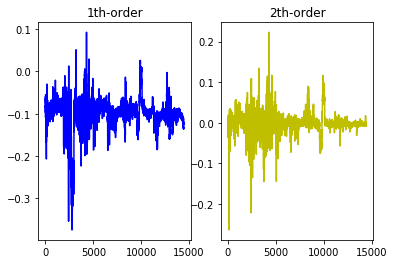

In [8]:
plt.subplot(1,  2,  1)  
plt.plot(data['z1'],c='b')
plt.title('1th-order')  

plt.subplot(1,  2,  2) 
plt.plot(data['z2'],c='y')
plt.title('2th-order')  

plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(data['z1']))

print(adfuller(data['z2']))

C:\Users\Bao Yu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-5.848087947239707, 3.6434036387586027e-07, 36, 14407, {'1%': -3.430803978309902, '5%': -2.8617406381674066, '10%': -2.5668767949590245}, -86783.64790901678)
(-8.914050372285649, 1.0847311636863247e-14, 40, 14403, {'1%': -3.4308041044112025, '5%': -2.8617406938942964, '10%': -2.5668768246218714}, -87030.90714432995)


In [10]:
log_return=data.loc[:,'log_btce':'log_stamp'].shift()-data.loc[:,'log_btce':'log_stamp']

In [11]:
log_return=log_return.iloc[1:,:]
log_return.head()

,log_btce,log_itbit,log_stamp
1,0.001193,0.000000,0.021738
2,0.011478,0.005975,0.012291
3,0.020930,0.008214,-0.000025
4,-0.037206,-0.021096,-0.023443
5,0.003883,0.003696,0.013821


In [12]:
np.mean(log_return)

log_btce    -0.000052
log_itbit   -0.000054
log_stamp   -0.000052
dtype: float64

In [13]:

sigma=np.array([[.00006981,.00004969,.00004277],
                [.00004969,.00007191,.00004431],
                [.00004277,.00004431 ,.00016066]])



In [14]:
delta=np.array([[-.01026519,     .00527142], #btce
                 [.00987649,    -.03120495], #itbit
                 [.00139251,      .1172607]]) #stamp
miu=np.zeros((3,1))

In [15]:
T=len(data)
A_t=np.zeros((2,2))
A_t=0.5*(delta.T)*(np.mat(sigma).I)*delta*(T-0)
for t in range(1,len(data)):
    temp=np.zeros((2,2))
    temp=0.5*(delta.T)*(np.mat(sigma).I)*delta*(T-t)
    A_t=np.concatenate((A_t,temp),axis=0)

In [16]:
A_t[:10]

matrix([[  69331.75621571, -116054.0674564 ],
        [-116054.0674564 , 1150225.13910867],
        [  69326.9561772 , -116046.03269682],
        [-116046.03269682, 1150145.50568724],
        [  69322.15613869, -116037.99793723],
        [-116037.99793723, 1150065.87226581],
        [  69317.35610018, -116029.96317765],
        [-116029.96317765, 1149986.23884438],
        [  69312.55606167, -116021.92841806],
        [-116021.92841806, 1149906.60542296]])

In [17]:
B_t=np.zeros((1,2))
B_t=(np.mat(miu).T)*(np.mat(sigma).I)*delta*(T-0)+\
(b.T-0.5*np.mat(sigma.diagonal())*beta)*(delta.T)*(np.mat(sigma).I)*delta*0.5*((T-0)^2)
for t in range(1,len(data)):
    temp=np.zeros((1,2))
    temp=(np.mat(miu).T)*(np.mat(sigma).I)*delta*(T-t)+\
    (b.T-0.5*np.mat(sigma.diagonal())*beta)*(delta.T)*(np.mat(sigma).I)*delta*0.5*((T-t)^2)
    B_t=np.concatenate((B_t,temp),axis=0)

In [18]:
B_t[:10]

matrix([[-2.04491976, 44.751171  ],
        [-2.04421198, 44.73568188],
        [-2.04407043, 44.73258406],
        [-2.0444951 , 44.74187753],
        [-2.04435354, 44.73877971],
        [-2.04364576, 44.72329058],
        [-2.0435042 , 44.72019276],
        [-2.04392887, 44.72948623],
        [-2.04378732, 44.72638841],
        [-2.04307953, 44.71089929]])

In [19]:
z=data.loc[:,'z1':'z2']

In [101]:
#LNAM
pi_lnam=np.zeros((1,3))
pi_lnam=np.mat((np.mat(sigma).I)*(miu+delta*(np.mat(z.iloc[0:1,:]).T))+\
    beta*((-2)*A_t[0:2,:]*np.mat(z.iloc[0:1,:]).T-np.mat(B_t[0:1,:]).T)).T
pi_lnam

matrix([[  8790.13763654,  35680.35320802, -44291.50290123]])

In [102]:
for t in range(1,len(data)):
    temp=np.zeros((1,3))
    temp=np.mat((np.mat(sigma).I)*(miu+delta*(np.mat(z.iloc[t:1+t,:]).T))+\
    beta*((-2)*A_t[2*t:2*t+2,:]*np.mat(z.iloc[t:1+t,:]).T-np.mat(B_t[t:1+t,:]).T)).T
    pi_lnam=np.concatenate((pi_lnam,temp),axis=0)

In [103]:
pi_lnam[:10]

matrix([[  8790.13763654,  35680.35320802, -44291.50290123],
        [ 10989.50697414,  -9442.95750586,  -1501.17061294],
        [ 12346.60173743, -23714.24120308,  11375.36904091],
        [ 13345.69472977,  -9622.99659061,  -3661.50160775],
        [ 10879.97360624,  -1160.43059901,  -9647.59079069],
        [ 11853.09193825, -22061.78850296,  10218.44265819],
        [  4526.69808198,  62822.27105564, -67110.09734196],
        [ 11623.28994157, -22809.83035886,  11192.21705031],
        [  6369.76066961,  34139.18334526, -40351.90227147],
        [  7903.32219794,  28018.92943109, -35774.72771593]])

In [104]:
gamma_lnam=pi_lnam.max()/10
gamma_lnam

57218.5969339517

In [24]:
'''
a_p=np.array([[8.62e-04],[2.58e-02]])
b_p=np.array([[1.14e-06],[-2.41e-06]])
miu_p=np.array([[6.10e-5],[7.52e-05],[7.92e-05]])
beta_p=np.array([[-6.94e-18,1],
                [-1,-1],
                [1,0]])
delta_p=np.array([[2.93e-03,-9.22e-02],
                 [1.35e-01,1.58e-02],
                [-1.59e-01,2.17e-02]])
sigma_p=np.array([[0.0002275,0.0001717,0.0002067],
                [0.0001717,0.0001979,0.0001868],
                [0.0002067,0.0001868,0.0002363]])
z_p=cons*a_p.T+np.mat(data['t']).T*b_p.T+np.mat(data.loc[:,'log_btce':'log_stamp'])*beta_p
T=len(data)
A_t_p=np.zeros((2,2))
A_t_p=0.5*(delta_p.T)*(np.mat(sigma_p).I)*delta_p*(T-0)
for t in range(1,len(data)):
    temp=np.zeros((2,2))
    temp=0.5*(delta_p.T)*(np.mat(sigma_p).I)*delta_p*(T-t)
    A_t_p=np.concatenate((A_t_p,temp),axis=0)
B_t_p=np.zeros((1,2))
B_t_p=(np.mat(miu_p).T)*(np.mat(sigma_p).I)*delta_p*(T-0)+\
(b_p.T-0.5*np.mat(sigma_p.diagonal())*beta_p)*(delta_p.T)*(np.mat(sigma_p).I)*delta_p*0.5*((T-0)^2)
for t in range(1,len(data)):
    temp=np.zeros((1,2))
    temp=(np.mat(miu_p).T)*(np.mat(sigma_p).I)*delta_p*(T-t)+\
    (b_p.T-0.5*np.mat(sigma_p.diagonal())*beta_p)*(delta_p.T)*(np.mat(sigma_p).I)*delta_p*0.5*((T-t)^2)
    B_t_p=np.concatenate((B_t_p,temp),axis=0)
pi_t_p=np.zeros((1,3))
pi_t_p=np.mat((np.mat(sigma_p).I)*(miu_p+delta_p*(np.mat(z_p[0]).T))+\
    beta_p*((-2)*A_t_p[0:2,:]*np.mat(z_p[0]).T-np.mat(B_t_p[0:1,:]).T)).T
for t in range(1,len(data)):
    temp=np.zeros((1,3))
    temp=np.mat((np.mat(sigma_p).I)*(miu_p+delta_p*(np.mat(z_p[t]).T))+\
    beta_p*((-2)*A_t_p[2*t:2*t+2,:]*np.mat(z_p[t]).T-np.mat(B_t_p[t:1+t,:]).T)).T
    pi_t_p=np.concatenate((pi_t_p,temp),axis=0)
gamma=pi_t_p.max()/10
gamma
'''

"\na_p=np.array([[8.62e-04],[2.58e-02]])\nb_p=np.array([[1.14e-06],[-2.41e-06]])\nmiu_p=np.array([[6.10e-5],[7.52e-05],[7.92e-05]])\nbeta_p=np.array([[-6.94e-18,1],\n                [-1,-1],\n                [1,0]])\ndelta_p=np.array([[2.93e-03,-9.22e-02],\n                 [1.35e-01,1.58e-02],\n                [-1.59e-01,2.17e-02]])\nsigma_p=np.array([[0.0002275,0.0001717,0.0002067],\n                [0.0001717,0.0001979,0.0001868],\n                [0.0002067,0.0001868,0.0002363]])\nz_p=cons*a_p.T+np.mat(data['t']).T*b_p.T+np.mat(data.loc[:,'log_btce':'log_stamp'])*beta_p\nT=len(data)\nA_t_p=np.zeros((2,2))\nA_t_p=0.5*(delta_p.T)*(np.mat(sigma_p).I)*delta_p*(T-0)\nfor t in range(1,len(data)):\n    temp=np.zeros((2,2))\n    temp=0.5*(delta_p.T)*(np.mat(sigma_p).I)*delta_p*(T-t)\n    A_t_p=np.concatenate((A_t_p,temp),axis=0)\nB_t_p=np.zeros((1,2))\nB_t_p=(np.mat(miu_p).T)*(np.mat(sigma_p).I)*delta_p*(T-0)+(b_p.T-0.5*np.mat(sigma_p.diagonal())*beta_p)*(delta_p.T)*(np.mat(sigma_p).I)*del

In [105]:
pi_lnam=pi_lnam*(1/gamma_lnam)

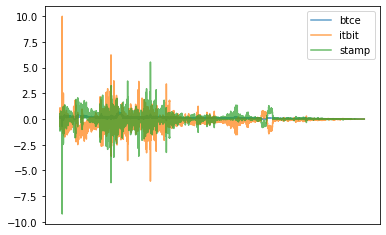

In [106]:
plt.plot(pi_lnam,alpha=0.7)
plt.legend(['btce','itbit','stamp'],loc='best')
plt.xticks([])
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/LNAM_positions.png')

In [107]:
p_l_lnam=np.zeros((len(data),1))
for i in range(len(data)):
    temp=np.mat(data.iloc[i,1:4])*(pi_lnam[i].T)
    p_l_lnam[i]=temp

In [127]:
data['P&L_LNAM']=p_l_lnam
print(data.iloc[:5,1:4])

   btce_price  itbit_price  stamp_price
0    439.5230       441.50    457.37723
1    438.9990       441.50    447.54221
2    433.9890       438.87    442.07505
3    425.0000       435.28    442.08631
4    441.1105       444.56    452.57262


C:\Users\Bao Yu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Bao Yu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Bao Yu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


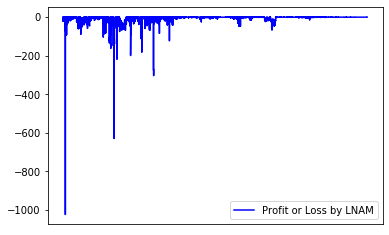

In [120]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data.loc[:,'datetime'],data.loc[:,'P&L_LNAM'],c='b')

plt.legend(['Profit or Loss by LNAM'],loc='best')
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/P&L_lnam.png')
plt.show()

In [64]:
# NAM

pi_nam=np.zeros((1,3))
pi_nam=np.mat((np.eye(3)-beta*np.mat(delta.T)*T)*(np.mat(sigma).I)*(miu+delta*(np.mat(z.iloc[0:1,:]).T))-\
        beta*np.mat(delta.T)*(np.mat(sigma).I)*delta*b*(T^2)/2).T
pi_nam

matrix([[  8788.12911848,  35725.88595749, -44334.88934639]])

In [67]:
for t in range(1,len(data)):
    temp=np.zeros((1,3))
    temp=np.mat((np.eye(3)-beta*np.mat(delta.T)*(T-t)*(np.mat(sigma).I)*(miu+delta*(np.mat(z.iloc[t:1+t,:]).T))-\
        beta*np.mat(delta.T)*(np.mat(sigma).I)*delta*b*((T-t)^2)/2)).T
    pi_nam= np.concatenate((pi_nam,temp),axis=0)

gamma_nam=pi_nam.max()/10
pi_nam=pi_nam*(1/gamma_nam)

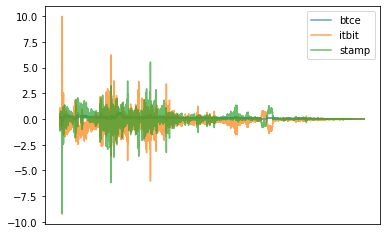

In [68]:
plt.plot(pi_nam,alpha=0.7)
plt.legend(['btce','itbit','stamp'],loc='best')
plt.xticks([])
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/NAM_positions.png')

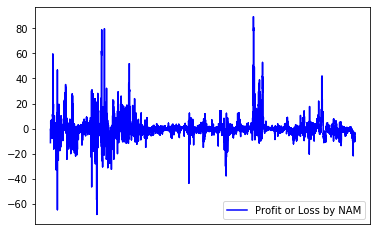

In [122]:
p_l_nam=np.zeros((len(data),1))
for i in range(len(data)):
    temp=np.mat(data.iloc[i,1:4])*(pi_nam[i].T)
    p_l_nam[i]=temp
data['P&L_NAM']=p_l_nam
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data.loc[:,'datetime'],data.loc[:,'P&L_NAM'],c='b')

plt.legend(['Profit or Loss by NAM'],loc='best')
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/P&L_nam.png')
plt.show()

In [76]:
#NAMIC

pi_namic=np.zeros((1,3))
pi_namic=np.mat(((beta*(beta.T*(np.mat(sigma).I)*beta).I)*beta.T-beta*(np.mat(delta.T))*\
          (np.mat(sigma).I)*T)*(np.mat(miu)+delta*(np.mat(z.iloc[0:1,:]).T))-\
            beta*np.mat(delta.T)*(np.mat(sigma).I)*delta*b*(T^2)/2).T

In [98]:
for t in range(1,len(data)):
    temp=np.zeros((1,3))
    temp=np.mat(((beta*(beta.T*(np.mat(sigma).I)*beta).I)*beta.T-beta*(np.mat(delta.T))*(np.mat(sigma).I)*(T-t))*(np.mat(miu)+\
            delta*(np.mat(z.iloc[t:1+t,:]).T))-\
            beta*np.mat(delta.T)*(np.mat(sigma).I)*delta*b*((T-t)^2)/2).T
    pi_namic= np.concatenate((pi_namic,temp),axis=0)

gamma_namic=pi_namic.max()/10
pi_namic=pi_namic*(1/gamma_namic)

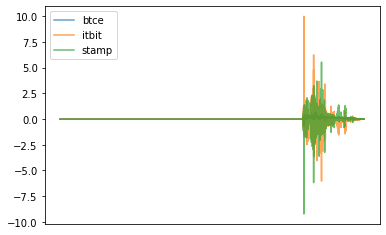

In [99]:
plt.plot(pi_namic,alpha=0.7)
plt.legend(['btce','itbit','stamp'],loc='best')
plt.xticks([])
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/NAMIC_positions.png')

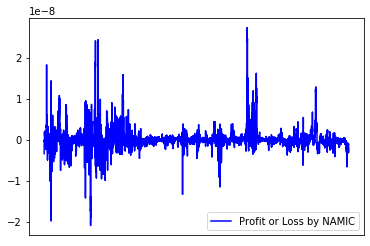

In [91]:
p_l_namic=np.zeros((len(data),1))
for i in range(len(data)):
    temp=np.mat(data.iloc[i,1:4])*(pi_namic[i].T)
    p_l_namic[i]=temp
data['P&L_NAMIC']=p_l_namic
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data.loc[:,'datetime'],data.loc[:,'P&L_NAMIC'],c='b')

plt.legend(['Profit or Loss by NAMIC'],loc='best')
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/P&L_namic.png')
plt.show()

In [92]:
# TINAMIC
pi_tinamic=np.zeros((1,3))
pi_tinamic=np.mat(beta*((beta.T*(np.mat(sigma).I)*beta).I)*beta.T*\
            (np.mat(miu)+delta*(np.mat(z.iloc[0:1,:]).T))).T
pi_tinamic

matrix([[ 1.10113379e-07,  8.49608735e-08, -1.94023666e-07]])

In [93]:
for t in range(1,len(data)):
    temp=np.zeros((1,3))
    temp=np.mat(beta*((beta.T*(np.mat(sigma).I)*beta).I)*beta.T*\
        (np.mat(miu)+delta*(np.mat(z.iloc[t:t+1,:]).T))).T
    pi_tinamic= np.concatenate((pi_tinamic,temp),axis=0)

gamma_tinamic=pi_tinamic.max()/10
pi_tinamic=pi_tinamic*(1/gamma_tinamic)

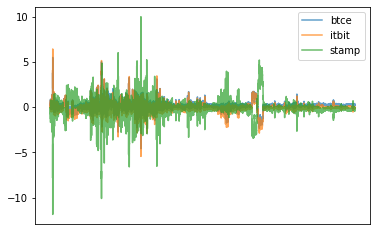

In [94]:
plt.plot(pi_tinamic,alpha=0.7)
plt.legend(['btce','itbit','stamp'],loc='best')
plt.xticks([])
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/TINAMIC_positions.png')

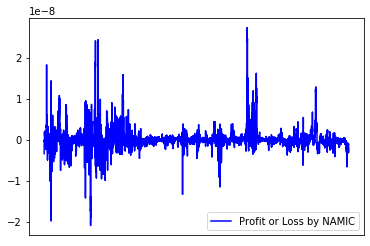

In [95]:
p_l_tinamic=np.zeros((len(data),1))
for i in range(len(data)):
    temp=np.mat(data.iloc[i,1:4])*(pi_tinamic[i].T)
    p_l_tinamic[i]=temp
data['P&L_TINAMIC']=p_l_namic
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data.loc[:,'datetime'],data.loc[:,'P&L_TINAMIC'],c='b')

plt.legend(['Profit or Loss by NAMIC'],loc='best')
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/P&L_tinamic.png')
plt.show()

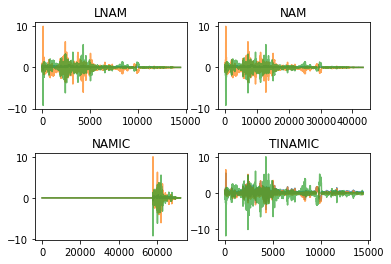

In [118]:
plt.subplot(2,  2,  1)  
plt.plot(pi_lnam,alpha=0.7)
plt.title('LNAM')  

plt.subplot(2,  2,  2) 
plt.plot(pi_nam,alpha=0.7)
plt.title('NAM')

plt.subplot(2,  2,  3) 
plt.plot(pi_namic,alpha=0.7)
plt.title('NAMIC')

plt.subplot(2,  2,  4) 
plt.plot(pi_tinamic,alpha=0.7)
plt.title('TINAMIC')
plt.subplots_adjust(wspace =0.2, hspace =0.5)#调整子图间距
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/positions_compare.png')
plt.show()


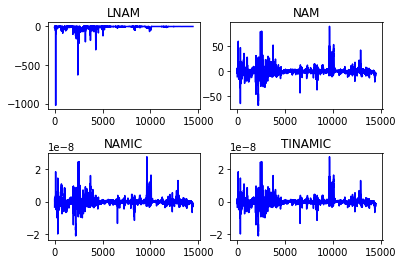

In [125]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.subplot(2,  2,  1)  
plt.plot(data.loc[:,'P&L_LNAM'],c='b')
plt.title('LNAM')  

plt.subplot(2,  2,  2) 
plt.plot(data.loc[:,'P&L_NAM'],c='b')
plt.title('NAM')

plt.subplot(2,  2,  3) 
plt.plot(data.loc[:,'P&L_NAMIC'],c='b')
plt.title('NAMIC')

plt.subplot(2,  2,  4) 
plt.plot(data.loc[:,'P&L_TINAMIC'],c='b')
plt.title('TINAMIC')
plt.subplots_adjust(wspace =0.2, hspace =0.5)#调整子图间距
plt.savefig('C:/Users/Bao Yu/Desktop/project/report/P&L_compare.png')
plt.show()